In [1]:
# importing the built in datasets
from sklearn import datasets
#importing pandas and numpy for the operations on the data
import pandas as pd
import numpy as np

## <font color="Blue"> Read the dataset


In [2]:
iris=pd.read_csv("Iris_dataset.csv")

### <font color="Blue"> Printing the first five rows

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### <font color="Blue"> Defining and Assigning Dependent and Independent Variables


In [4]:
X=iris.iloc[:,:4] # Independent Variables 
Y=iris['Species'] # Dependent Variables

In [5]:
X.head()#Print the first few rows of the Indepedent Variables

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## <font color="Brown"> Importing the traintestsplit to divide the data to train and test set

In [6]:
from sklearn.model_selection import train_test_split

### <font color="Brown"> Splitting the data into train and test



In [7]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## <font color="sky blue"> Importing the Matplotlib.pyplot for graplical representation of Data



In [8]:
import matplotlib.pyplot as plt

## <font color="Sky Blue"> Importing the Confussion Matrix for checking the predictions

In [9]:
from sklearn.metrics import confusion_matrix

## <font color="Sky Blue"> Import the KNeighboursClassifier to predict the classes


In [10]:
from sklearn.neighbors import KNeighborsClassifier

## <font color="purple"> Defigning the Classifier model


In [11]:
knn=KNeighborsClassifier(n_neighbors=3)

### <font color="purple"> Fitting the model to the train data


In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
print("KNN Score",knn.score(x_test,y_test)*100)

KNN Score 96.66666666666667


## <font color="purple"> Predicting for the test data using the model


In [14]:
prediction=knn.predict(x_test)

### <font color="sky blue"> Actual values of the Classes for the Test Set

In [15]:
y_test

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
121     virginica
66     versicolor
24         setosa
8          setosa
126     virginica
22         setosa
44         setosa
97     versicolor
93     versicolor
26         setosa
Name: Species, dtype: object

### <font color="sky Blue"> Pridicted classes for the Test Set

In [16]:
prediction

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

## <font color="purple"> Confussion matrix for the prediction by the model

In [17]:
cm=confusion_matrix(y_test,prediction)
print('CONFUSSION MATRIX is :',cm,sep='\n')

CONFUSSION MATRIX is :
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## <font color="orange"> Importing the Accuracy Measure

In [18]:
from sklearn.metrics import f1_score

In [19]:
# A list for checcking the best K value
k_list=[i for i in range(1,30)]

In [20]:
# A list for the mis_classification for different K value
mis_class=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    #cm=confusion_matrix(y_test,prediction)
    mis_class.append(sum(prediction!=y_test))

In [21]:
# Miss_classsification by the model for k ranging from 1 to 30
mis_class

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1]

## <font color="sky Blue"> Plotting the Miss Classifications Versus the K-Value to get best K-Value with minimal error

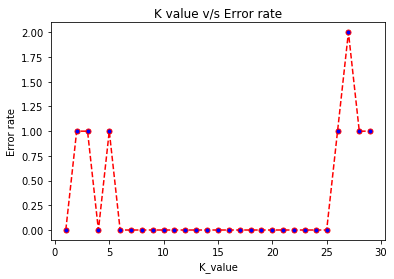

In [22]:
plt.plot(k_list,mis_class,color="red",linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.title("K value v/s Error rate")
plt.xlabel('K_value')
plt.ylabel('Error rate')
plt.show()

## <font color="red"> We can infer from the above graph that for K-Value value between 6 to 24 Error is minimum